In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# One hot encoding
insurance_data = pd.get_dummies(insurance_data)
insurance_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
# Let us create X and Y
Y = insurance_data["charges"]
X = insurance_data.drop("charges", axis = 1)

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [8]:
# Let's check train test shape
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_train Shape:",Y_train.shape)
print("Y_test Shape:",Y_test.shape)

X_train Shape: (1070, 11)
X_test Shape: (268, 11)
Y_train Shape: (1070,)
Y_test Shape: (268,)


In [28]:
# Let's create Model
import tensorflow as tf
tf.random.set_seed(42)

# Model creation
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics = ["mae"])

# Fit the model
hitsory = insurance_model.fit(X_train, 
                    Y_train, 
                    callbacks= tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 10),
                    validation_split = 0.15,
                    epochs = 300)

Epoch 1/300
29/29 [==============================] - 1s 8ms/step - loss: 12405.3320 - mae: 12405.3320 - val_loss: 8050.1094 - val_mae: 8050.1094
Epoch 2/300
29/29 [==============================] - 0s 3ms/step - loss: 7909.5879 - mae: 7909.5879 - val_loss: 6836.7280 - val_mae: 6836.7280
Epoch 3/300
29/29 [==============================] - 0s 3ms/step - loss: 7459.8096 - mae: 7459.8096 - val_loss: 6673.3633 - val_mae: 6673.3633
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 7293.5303 - mae: 7293.5303 - val_loss: 6476.8228 - val_mae: 6476.8228
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 7131.0479 - mae: 7131.0479 - val_loss: 6305.5425 - val_mae: 6305.5425
Epoch 6/300
29/29 [==============================] - 0s 3ms/step - loss: 6886.4658 - mae: 6886.4658 - val_loss: 6013.5083 - val_mae: 6013.5083
Epoch 7/300
29/29 [==============================] - 0s 3ms/step - loss: 6639.0615 - mae: 6639.0615 - val_loss: 5738.7983 - val_mae: 5738.79

In [29]:
# Evalute model
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1860.8533 - mae: 1860.8533


[1860.853271484375, 1860.853271484375]

Text(0.5, 0, 'epochs')

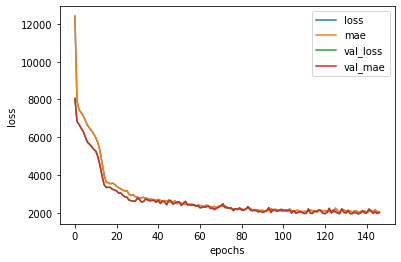

In [31]:
pd.DataFrame(hitsory.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

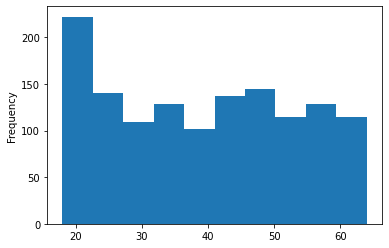

In [33]:
X["age"].plot(kind = "hist")

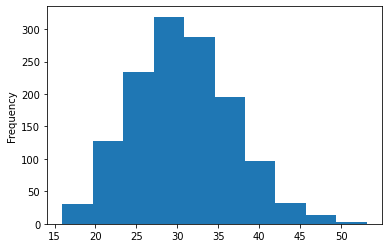

In [34]:
X["bmi"].plot(kind = "hist")

### Preprocessing Data -- Normalization and standarization

In [56]:
# Read in the insurance dataset
insurance_data_new = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex", "smoker", "region"])
)

In [61]:
# Let us create X and Y
Y = insurance_data_new["charges"]
X = insurance_data_new.drop("charges", axis = 1)

In [62]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [63]:
ct.fit(X_train)
X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)

In [74]:
# Let's create Model
import tensorflow as tf
tf.random.set_seed(42)

# Model creation
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),

    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics = ["mae"])

# Fit the model
hitsory = insurance_model.fit(X_train_scaled, 
                    Y_train, 
                    callbacks= tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 15),
                    validation_split = 0.15,
                    epochs = 300)

Epoch 1/300
29/29 [==============================] - 1s 8ms/step - loss: 12881.3467 - mae: 12881.3467 - val_loss: 8717.0547 - val_mae: 8717.0547
Epoch 2/300
29/29 [==============================] - 0s 4ms/step - loss: 8241.9600 - mae: 8241.9600 - val_loss: 6984.1094 - val_mae: 6984.1094
Epoch 3/300
29/29 [==============================] - 0s 3ms/step - loss: 6633.5591 - mae: 6633.5591 - val_loss: 5463.0068 - val_mae: 5463.0068
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 4487.1489 - mae: 4487.1489 - val_loss: 3452.3782 - val_mae: 3452.3782
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 3601.0852 - mae: 3601.0852 - val_loss: 3171.4656 - val_mae: 3171.4656
Epoch 6/300
29/29 [==============================] - 0s 5ms/step - loss: 3535.0225 - mae: 3535.0225 - val_loss: 3136.1331 - val_mae: 3136.1331
Epoch 7/300
29/29 [==============================] - 0s 8ms/step - loss: 3472.6089 - mae: 3472.6089 - val_loss: 2880.9712 - val_mae: 2880.97

Text(0.5, 0, 'epochs')

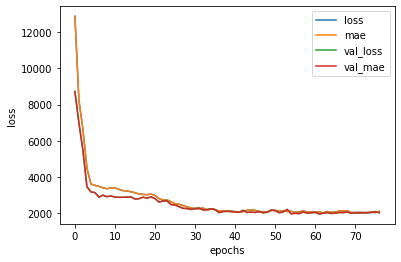

In [75]:
pd.DataFrame(hitsory.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [67]:
# Evalute model
insurance_model.evaluate(X_test_scaled, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1748.8201 - mae: 1748.8201


[1748.820068359375, 1748.820068359375]